# **Modeling**

# Part 1: Preparing the Data

In [1445]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [1446]:
os.getcwd()

'/workspace'

In [1447]:
data = pd.read_csv('Crime_Clean2.csv')

In [1448]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [1449]:
len(data)

235368

In [1450]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [1451]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [1452]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [1453]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [1454]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [1455]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [1456]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [1457]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

In [1458]:
df = data.groupby(['Day']).size().reset_index(name='Count')
df

,Day,Count
0,2016-07-01,200
1,2016-07-02,146
2,2016-07-03,119
3,2016-07-04,99
4,2016-07-05,139
...,...,...
1676,2021-02-01,45
1677,2021-02-02,57
1678,2021-02-03,64
1679,2021-02-04,50


In [1459]:
df2 = data.groupby(['Day','Crime Name1']).size().reset_index(name='Count')
df2

,Day,Crime Name1,Count
0,2016-07-01,Crime Against Person,21
1,2016-07-01,Crime Against Property,112
2,2016-07-01,Crime Against Society,67
3,2016-07-02,Crime Against Person,19
4,2016-07-02,Crime Against Property,58
...,...,...,...
5038,2021-02-04,Crime Against Property,40
5039,2021-02-04,Crime Against Society,8
5040,2021-02-05,Crime Against Person,1
5041,2021-02-05,Crime Against Property,5


In [1460]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Day']).size().reset_index(name='Crime Against Person Count')
df2

,Day,Crime Against Person Count
0,2016-07-01,21
1,2016-07-02,19
2,2016-07-03,15
3,2016-07-04,15
4,2016-07-05,18
...,...,...
1676,2021-02-01,5
1677,2021-02-02,7
1678,2021-02-03,8
1679,2021-02-04,2


In [1461]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Day,Crime Against Property Count
0,2016-07-01,112
1,2016-07-02,58
2,2016-07-03,58
3,2016-07-04,46
4,2016-07-05,82
...,...,...
1676,2021-02-01,34
1677,2021-02-02,47
1678,2021-02-03,53
1679,2021-02-04,40


In [1462]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Day,Crime Against Society Count
0,2016-07-01,67
1,2016-07-02,69
2,2016-07-03,46
3,2016-07-04,38
4,2016-07-05,39
...,...,...
1676,2021-02-01,6
1677,2021-02-02,3
1678,2021-02-03,3
1679,2021-02-04,8


In [1463]:
df3 = data.groupby(['Day','Place']).size().reset_index(name='Count')
df3

,Day,Place,Count
0,2016-07-01,Bank - ATM,5
1,2016-07-01,Bank/S&L/Credit Union,2
2,2016-07-01,Commercial - Office Building,4
3,2016-07-01,Convenience Store,1
4,2016-07-01,Gas Station,1
...,...,...,...
51467,2021-02-05,Commercial - Office Building,1
51468,2021-02-05,Convenience Store,2
51469,2021-02-05,Other/Unknown,2
51470,2021-02-05,Residence - Single Family,1


In [1464]:
df4 = data.groupby(['Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Day,Time_of_Day,Count
0,2016-07-01,Afternoon,45
1,2016-07-01,Early Morning,7
2,2016-07-01,Late Afternoon/Early Evening,27
3,2016-07-01,Late Night,46
4,2016-07-01,Morning,33
...,...,...,...
10053,2021-02-04,Morning,5
10054,2021-02-04,Night,8
10055,2021-02-05,Afternoon,1
10056,2021-02-05,Late Night,3


In [1465]:
df5 = data.groupby(['Day','Weekday']).size().reset_index(name='Count')
df5

,Day,Weekday,Count
0,2016-07-01,1.0,200
1,2016-07-02,0.0,146
2,2016-07-03,0.0,119
3,2016-07-04,1.0,99
4,2016-07-05,1.0,139
...,...,...,...
1676,2021-02-01,1.0,45
1677,2021-02-02,1.0,57
1678,2021-02-03,1.0,64
1679,2021-02-04,1.0,50


In [1466]:
df6 = data.groupby(['Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Day,Mean Income
0,2016-07-01,106514.025000
1,2016-07-02,98466.287671
2,2016-07-03,103432.134454
3,2016-07-04,100306.131313
4,2016-07-05,105139.136691
...,...,...
1676,2021-02-01,112109.111111
1677,2021-02-02,131124.070175
1678,2021-02-03,104034.656250
1679,2021-02-04,119877.500000


In [1467]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Day,Mean Pop
0,2016-07-01,2144.675000
1,2016-07-02,2088.417808
2,2016-07-03,2457.554622
3,2016-07-04,2180.292929
4,2016-07-05,2034.438849
...,...,...
1676,2021-02-01,2029.088889
1677,2021-02-02,1933.000000
1678,2021-02-03,2027.640625
1679,2021-02-04,1990.660000


In [1468]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Day,Mean Public Transportation %
0,2016-07-01,0.184065
1,2016-07-02,0.159419
2,2016-07-03,0.165274
3,2016-07-04,0.186869
4,2016-07-05,0.185366
...,...,...
1676,2021-02-01,0.180293
1677,2021-02-02,0.163171
1678,2021-02-03,0.172570
1679,2021-02-04,0.134308


In [1469]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Day,Mean Victims
0,2016-07-01,1.030000
1,2016-07-02,1.041096
2,2016-07-03,1.033613
3,2016-07-04,1.070707
4,2016-07-05,1.014388
...,...,...
1676,2021-02-01,1.000000
1677,2021-02-02,1.070175
1678,2021-02-03,1.031250
1679,2021-02-04,1.000000


In [1470]:
df_final = pd.merge(df, df6b, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income
0,2016-07-01,200,106514.025000
1,2016-07-02,146,98466.287671
2,2016-07-03,119,103432.134454
3,2016-07-04,99,100306.131313
4,2016-07-05,139,105139.136691


In [1471]:
df_final = pd.merge(df_final, df6c, how='left', on=['Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388


In [1472]:
df_final2 = pd.merge(df_final,df2, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18
...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2


In [1473]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82
...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40


In [1474]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39
...,...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34,6
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47,3
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53,3
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40,8


In [1475]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Day']).size().reset_index(name=place + " Place Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Day'])
        
    return df_final

In [1476]:
df_final3 = func(data,df_final2)
df_final3.shape

(1681, 92)

In [1477]:
df_final3.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [1478]:
df_final3['Day'] = pd.to_datetime(df_final3['Day'])

In [1479]:
import datetime
import calendar

df_final3['Day_Of_Week'] = df_final3['Day'].dt.dayofweek

days= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

df_final3['Day_Of_Week'] = df_final3['Day_Of_Week'].apply(lambda x: days[x])

df_final3['Day_Of_Week'].value_counts()

Friday       241
Sunday       240
Thursday     240
Saturday     240
Wednesday    240
Tuesday      240
Monday       240
Name: Day_Of_Week, dtype: int64

In [1480]:
len(df_final3)

1681

In [1481]:
data = df_final3.copy()

In [1482]:
def rolling_crime_count_func(data):
        
        data['30 Day Rolling Crimes Against Society Max Count'] = data['Crime Against Society Count'].shift(1).rolling(30).std()
        data['30 Day Rolling Crimes Against Property Max Count'] = data['Crime Against Property Count'].shift(1).rolling(30).std()
        data['30 Day Rolling Crimes Against Persons Max Count'] = data['Crime Against Person Count'].shift(1).rolling(30).std()
        
        data['7 Day Rolling Crimes Against Society Max Count'] = data['Crime Against Society Count'].shift(1).rolling(7).std()
        data['7 Day Rolling Crimes Against Property Max Count'] = data['Crime Against Property Count'].shift(1).rolling(7).std()
        data['7 Day Rolling Crimes Against Persons Max Count'] = data['Crime Against Person Count'].shift(1).rolling(7).std()
        

        data['2 Day Rolling Crimes Against Society Max Count'] = data['Crime Against Society Count'].shift(1).rolling(2).std()
        data['2 Day Rolling Crimes Against Property Max Count'] = data['Crime Against Property Count'].shift(1).rolling(2).std()
        data['2 Day Rolling Crimes Against Persons Max Count'] = data['Crime Against Person Count'].shift(1).rolling(2).std()
        
        return data

In [1483]:
def rolling_acs_count_func(data):
        
        data['30 Rolling Mean Income'] = data['Mean Income'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Pop'] = data['Mean Pop'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Victims'] = data['Mean Victims'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Public Transportation %'] = data['Mean Public Transportation %'].shift(1).rolling(30).mean()  
        
        return data

In [1484]:
import re

def rolling_place_count_func(data):
    
    pattern = r'.*\s*(Place)\.*'
    
    for column in data.columns:
        
        if re.match(pattern, column):
            
            data['30 Rolling Mean ' +  column] = data[column].shift(1).rolling(30).mean()
        
    return data

In [1485]:
data = rolling_crime_count_func(data)

In [1486]:
data = rolling_acs_count_func(data)

In [1487]:
data = rolling_place_count_func(data)

In [1488]:
len(data)

1681

In [1489]:
data.head(9)

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-07-06,142,98814.795775,2193.971831,0.162601,1.021127,14,81,47,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-07-07,116,114520.681034,2160.137931,0.166828,1.077586,14,65,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-07-08,118,100957.923729,2416.169492,0.198177,1.016949,13,63,42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-07-09,92,96765.489130,2086.793478,0.169123,1.010870,9,46,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1490]:
data.columns

Index(['Day', 'Count', 'Mean Income', 'Mean Pop',
       'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       'Crime Against Society Count',
       'Air/Bus/Train/Metro Terminal Place Count',
       ...
       '30 Rolling Mean Retail - Video Store Place Count',
       '30 Rolling Mean School/College Place Count',
       '30 Rolling Mean Street - Alley Place Count',
       '30 Rolling Mean Street - Bus Stop Place Count',
       '30 Rolling Mean Street - Commercial Place Count',
       '30 Rolling Mean Street - In vehicle Place Count',
       '30 Rolling Mean Street - Other Place Count',
       '30 Rolling Mean Street - Residential Place Count',
       '30 Rolling Mean Theater Place Count',
       '30 Rolling Mean Wooded Area Place Count'],
      dtype='object', length=189)

In [1491]:
data['30 Day Rolling Crimes Against Property Max Count'].isnull().sum()

30

In [1492]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0,inplace=True)

In [1493]:
data['30 Day Rolling Crimes Against Property Max Count'].isnull().sum()

0

In [1494]:
label1 = np.array(data['Crime Against Society Count'])
label2 = np.array(data['Crime Against Property Count'])
label3 = np.array(data['Crime Against Person Count'])

In [1495]:
data['Day'] = pd.to_datetime(data['Day'])

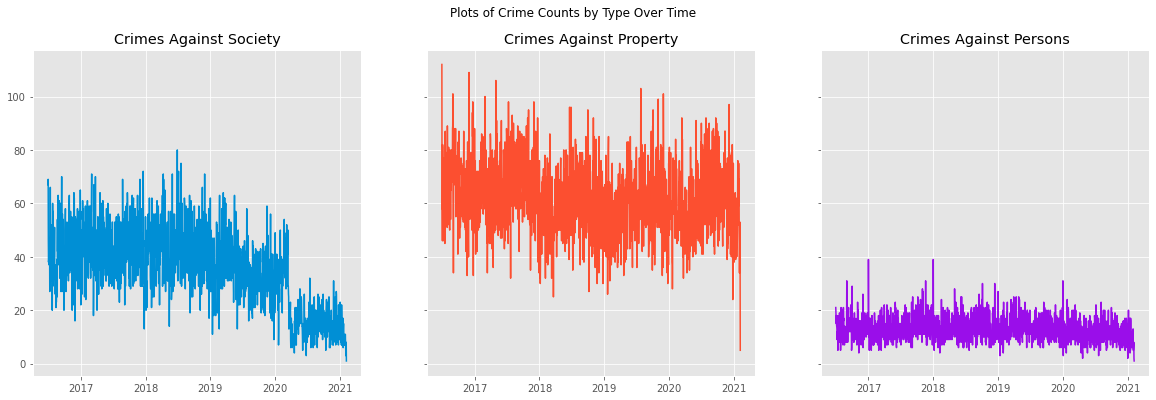

In [1496]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

fig.suptitle('Plots of Crime Counts by Type Over Time')

ax1.plot(data['Day'], data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')

ax2.plot(data['Day'], data['Crime Against Property Count'], c = '#fc4f30')
ax2.set_title('Crimes Against Property')

ax3.plot(data['Day'], data['Crime Against Person Count'], c = '#9a0eea')
ax3.set_title('Crimes Against Persons')

plt.show()


In [1497]:
features = data.copy()

In [1498]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data.columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [1499]:
columns_to_drop.remove('Day_Of_Week')

In [1500]:
data = data.drop(columns_to_drop,axis=1)

In [1501]:
data.columns

Index(['Day_Of_Week', '30 Day Rolling Crimes Against Society Max Count',
       '30 Day Rolling Crimes Against Property Max Count',
       '30 Day Rolling Crimes Against Persons Max Count',
       '7 Day Rolling Crimes Against Society Max Count',
       '7 Day Rolling Crimes Against Property Max Count',
       '7 Day Rolling Crimes Against Persons Max Count',
       '2 Day Rolling Crimes Against Society Max Count',
       '2 Day Rolling Crimes Against Property Max Count',
       '2 Day Rolling Crimes Against Persons Max Count',
       '30 Rolling Mean Income', '30 Rolling Mean Pop',
       '30 Rolling Mean Victims', '30 Rolling Mean Public Transportation %',
       '30 Rolling Mean Air/Bus/Train/Metro Terminal Place Count',
       '30 Rolling Mean Auto Dealership Place Count',
       '30 Rolling Mean Auto Repair Place Count',
       '30 Rolling Mean Bank - ATM Place Count',
       '30 Rolling Mean Bank/S&L/Credit Union Place Count',
       '30 Rolling Mean Bar/Night Club Place Count',


In [1502]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Day_Of_Week'] = le.fit_transform(data['Day_Of_Week'])

In [1503]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,label1, test_size=0.25)

In [1504]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(train, train_labels)

RandomForestRegressor()

In [1505]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predictions = model.predict(test)
mean_absolute_error(test_labels, predictions)

7.0216152019002385

In [1506]:
errors = abs(predictions - test_labels)
np.mean(errors)

7.0216152019002385

In [1507]:
mean_squared_error(test_labels, predictions)

81.43545178147268

In [1508]:
mean_absolute_percentage_error(test_labels, predictions)

0.2530888053203071

In [1509]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

74.69111946796929

In [1510]:
importances1 = list(model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [1511]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [1512]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.015):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [1513]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

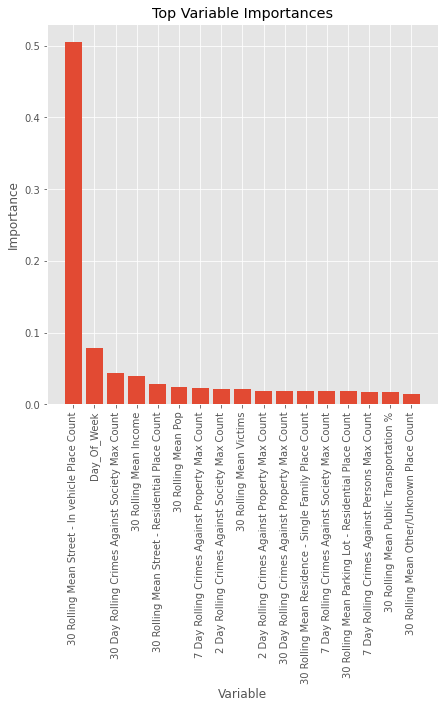

In [1514]:
plotImportances(top_importances1, top_features_list1)

In [1515]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

param_grid_orig = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': list(np.linspace(3,30).astype(int)),
    'max_features': ['auto','sqrt'] + list(np.arange(0.3,1,0.1)),
    'max_leaf_nodes': list(np.linspace(10,50,500).astype(int)),
    'min_samples_split': [2,5,10,15,20],
    'bootstrap': [True,False]
}

estimator = RandomForestRegressor(random_state=4)

rs = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs.fit(train, train_labels)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=4), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000...
                                                         0.900000000000000

In [1516]:
best_model = rs.best_estimator_
predictions = best_model.predict(test)
mean_absolute_error(test_labels, predictions)

7.311449797185027

In [1517]:
errors = abs(predictions - test_labels)
np.mean(errors)

7.311449797185027

In [1518]:
mean_absolute_percentage_error(test_labels, predictions)

0.2666836373832987

In [1519]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

73.33163626167013

In [1520]:
importances1 = list(best_model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [1521]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

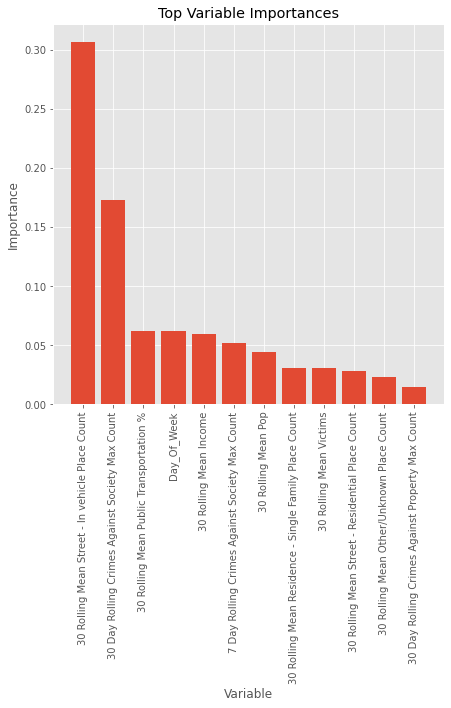

In [1522]:
plotImportances(top_importances1, top_features_list1)

In [1523]:
test_features = features[1260:]
test_features.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
1260,2019-12-13,110,104451.072727,2250.872727,0.197867,1.018182,6,69,35,0.0,...,0.0,0.0,0.0,0.0,0.0,17.166667,0.0,7.466667,0.0,0.0
1261,2019-12-14,95,103590.378947,2175.421053,0.163199,1.052632,8,58,29,0.0,...,0.0,0.0,0.0,0.0,0.0,17.100000,0.0,7.400000,0.0,0.0
1262,2019-12-15,104,103074.721154,2108.298077,0.165762,1.019231,17,58,29,0.0,...,0.0,0.0,0.0,0.0,0.0,16.900000,0.0,7.200000,0.0,0.0
1263,2019-12-16,81,113627.333333,2178.172840,0.148358,1.037037,10,55,16,0.0,...,0.0,0.0,0.0,0.0,0.0,16.900000,0.0,7.166667,0.0,0.0
1264,2019-12-17,120,107348.933333,2228.141667,0.192701,1.025000,17,69,34,0.0,...,0.0,0.0,0.0,0.0,0.0,16.133333,0.0,7.166667,0.0,0.0


In [1524]:
dates = test_features['Day']

In [1525]:
len(dates)

421

In [1526]:
len(predictions)

421

In [1527]:
len(test_labels)

421

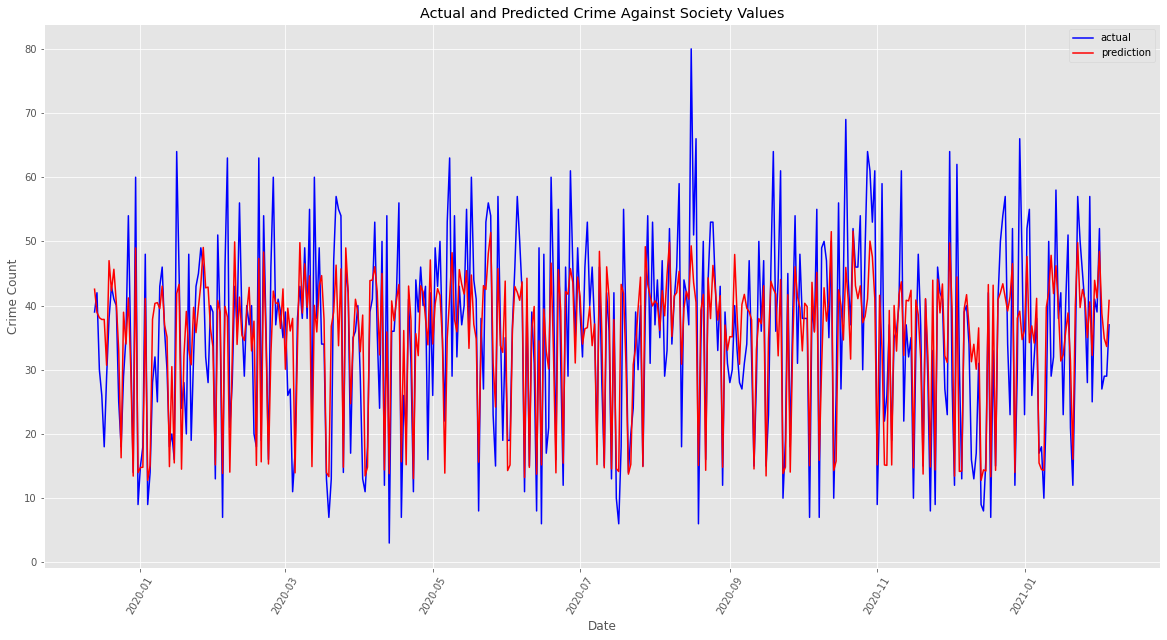

In [1528]:
plt.plot(dates, test_labels, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [1529]:
train2, test2, train_labels2, test_labels2 = train_test_split(data,label2, test_size=0.25)

In [1530]:
model2 = RandomForestRegressor()

model2.fit(train2, train_labels2)

RandomForestRegressor()

In [1531]:
predictions2 = model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

9.181733966745844

In [1532]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

9.181733966745844

In [1533]:
mean_squared_error(test_labels2, predictions2)

139.17382209026127

In [1534]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.1571124114540163

In [1535]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

84.28875885459837

In [1536]:
importances1 = list(model2.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [1537]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

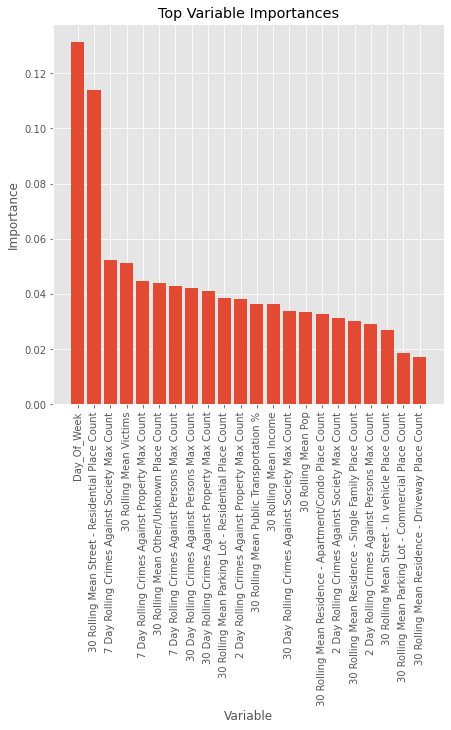

In [1538]:
plotImportances(top_importances1, top_features_list1)

In [1539]:
rs2 = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs2.fit(train2, train_labels2)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=4), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000...
                                                         0.900000000000000

In [1540]:
best_model2 = rs2.best_estimator_
predictions2 = best_model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

9.037528365398254

In [1541]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

9.037528365398254

In [1542]:
mean_squared_error(test_labels2, predictions2)

134.53437131502616

In [1543]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.15540154743389736

In [1544]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

84.45984525661027

In [1545]:
importances2 = list(best_model2.feature_importances_)
feature_list2 = list(data.columns)
feature_importances2 = [(feature, importance) for feature, importance in zip(feature_list2,importances2)]
feature_importances2 = sorted(feature_importances2, key = lambda x: x[1], reverse=True)

In [1546]:
top_features_list2, top_importances2 = getImportances(feature_importances2)

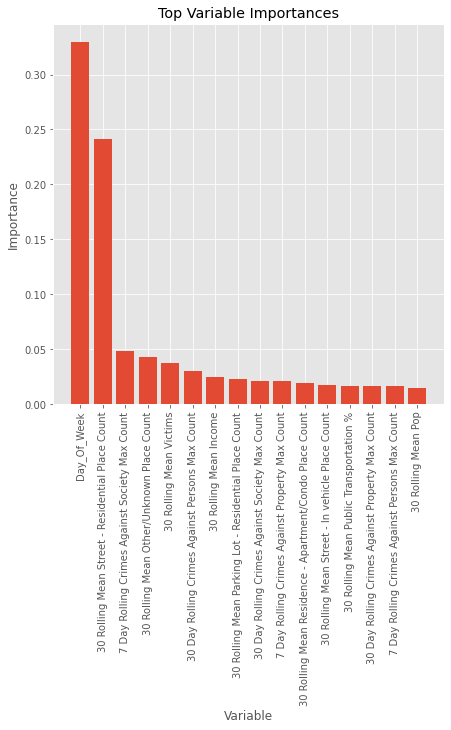

In [1547]:
plotImportances(top_importances2, top_features_list2)

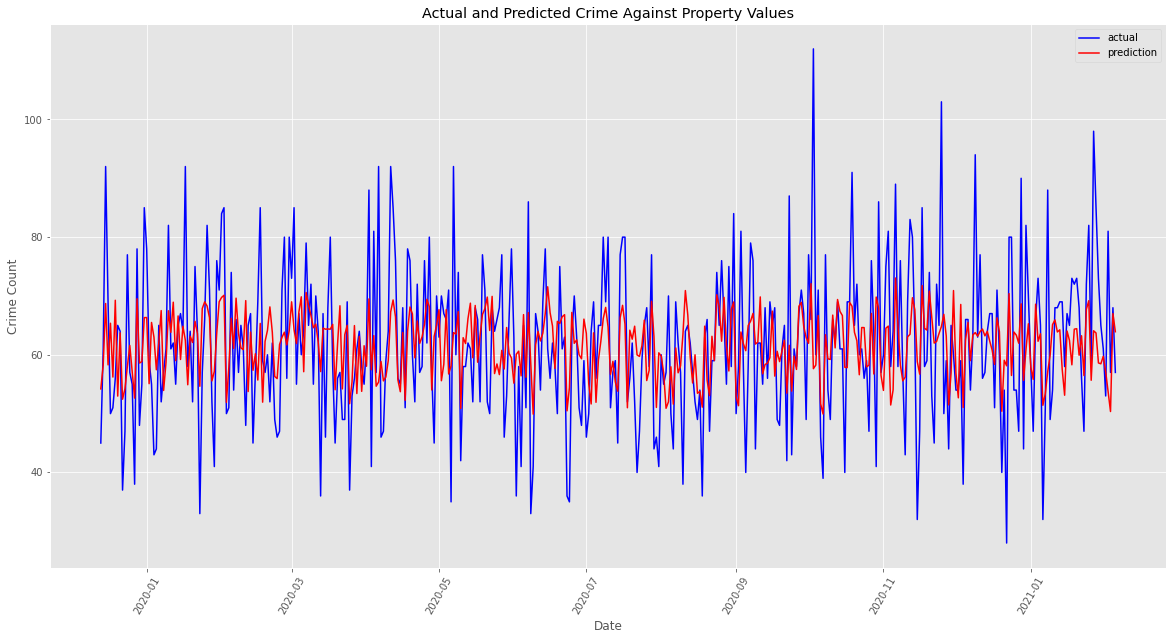

In [1548]:
plt.plot(dates, test_labels2, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [1549]:
train3, test3, train_labels3, test_labels3 = train_test_split(data,label3, test_size=0.25)

In [1550]:
model3 = RandomForestRegressor()

model3.fit(train3, train_labels3)

RandomForestRegressor()

In [1551]:
predictions3 = model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

3.3407838479809984

In [1552]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

3.3407838479809984

In [1553]:
mean_squared_error(test_labels3, predictions3)

18.27384916864608

In [1554]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.31056092153090453

In [1555]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

68.94390784690955

In [1556]:
importances3 = list(model3.feature_importances_)
feature_list3 = list(data.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [1557]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

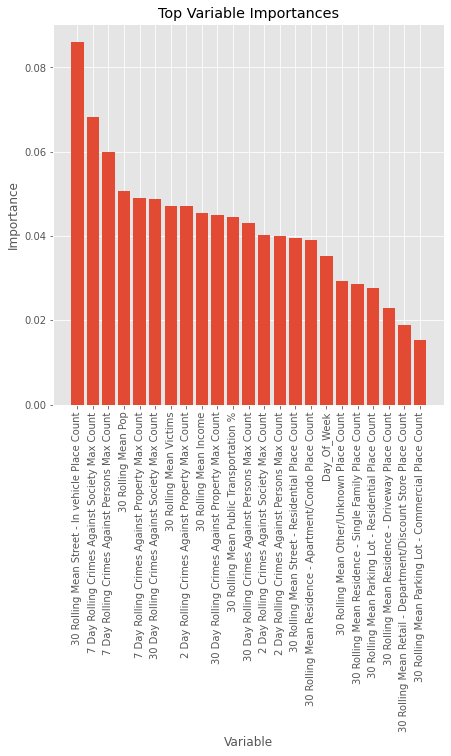

In [1558]:
plotImportances(top_importances3, top_features_list3)

In [1559]:
rs3 = RandomizedSearchCV(estimator, param_grid_orig, n_jobs=-1, cv=KFold(5, shuffle=False), n_iter=5)

rs3.fit(train3, train_labels3)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestRegressor(random_state=4), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 3, 4, 4, 5, 5, 6, 6, 7,
                                                      7, 8, 9, 9, 10, 10, 11,
                                                      11, 12, 12, 13, 14, 14,
                                                      15, 15, 16, 16, 17, 17,
                                                      18, 18, ...],
                                        'max_features': ['auto', 'sqrt', 0.3,
                                                         0.4, 0.5,
                                                         0.6000000000000001,
                                                         0.7000000...
                                                         0.900000000000000

In [1560]:
best_model3 = rs3.best_estimator_
predictions3 = best_model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

3.2528270059682223

In [1561]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

3.2528270059682223

In [1562]:
mean_squared_error(test_labels3, predictions3)

17.554052012880025

In [1563]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.30143261812331207

In [1564]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

69.8567381876688

In [1565]:
importances3 = list(best_model3.feature_importances_)
feature_list3 = list(data.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [1566]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

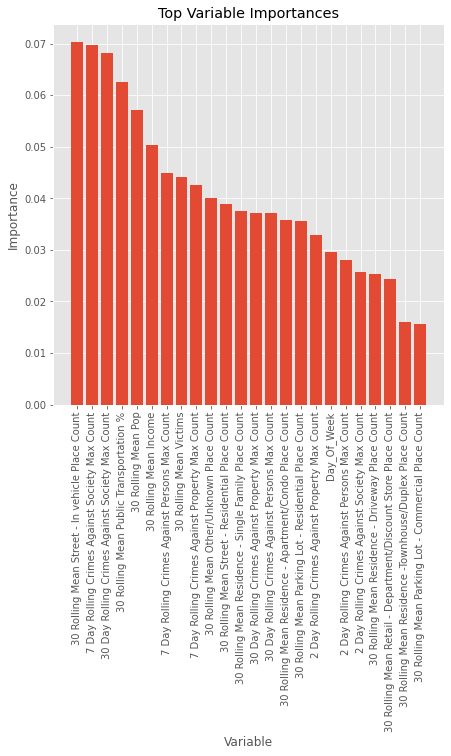

In [1567]:
plotImportances(top_importances3, top_features_list3)

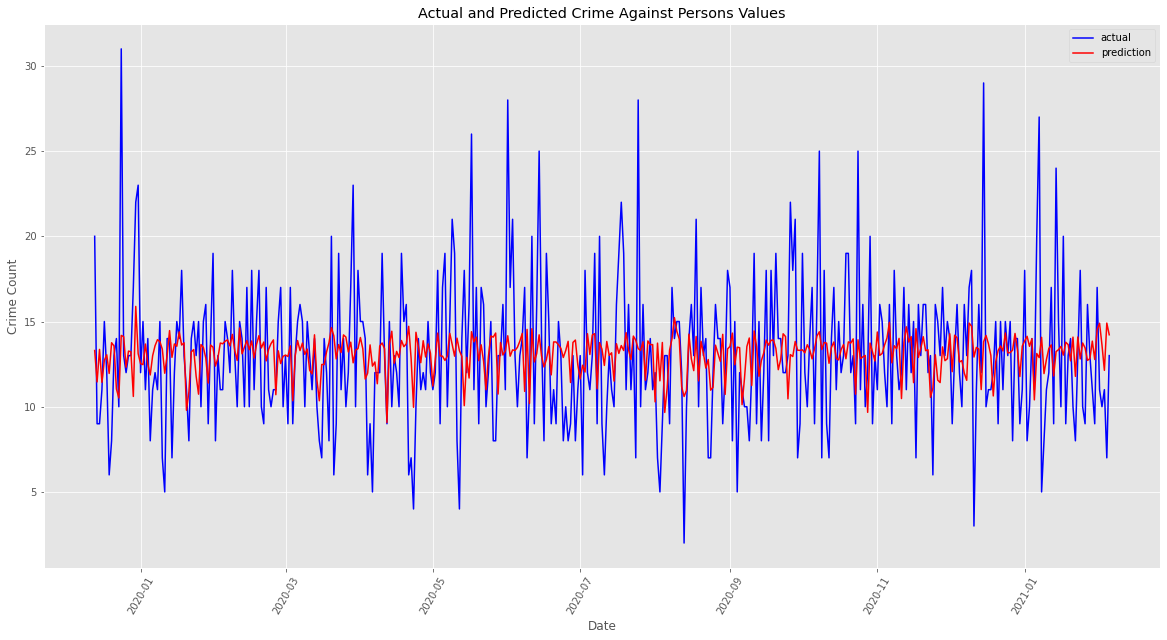

In [1568]:
plt.plot(dates, test_labels3, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()